# TP 2: Préparation des données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Partie 1

1) Télecharger les données tips de seaborn

In [2]:
tips = sns.load_dataset("tips")
df_copy=tips.copy()

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2) Encoder les variable: 'sex', 'day', 'smoker', 'time'

In [4]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [5]:
one_hot = OneHotEncoder()
one_hot.fit(tips[['sex', 'day', 'smoker', 'time']])
encoded_features_tips = one_hot.transform(tips[['sex', 'day', 'smoker', 'time']]).toarray()
encoded_features_tips


array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

3) Construire ```ohe_df```, un DataFrame qui contient les données encodées de la question 2

In [6]:
one_hot_df=pd.DataFrame(encoded_features_tips, columns=one_hot.get_feature_names_out())

In [7]:
one_hot_df.head()

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


4) créer ```df_numeric```, un DataFrame qui contient les données numériqures

In [8]:
df_numeric_tips= tips.select_dtypes(include=[np.number])

In [9]:
df_numeric_tips.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


5) Concaténer ```ohe_df``` et ```df_numeric```, (```df =ohe_df + df_numeric```)

In [10]:
df= pd.concat([one_hot_df,df_numeric_tips], axis=1)
df_copy=df.copy()

In [11]:
df.head()

,sex_Female,sex_Male,day_Fri,day_Sat,day_Sun,day_Thur,smoker_No,smoker_Yes,time_Dinner,time_Lunch,total_bill,tip,size
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,16.99,1.01,2
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,10.34,1.66,3
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,21.01,3.50,3
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,23.68,3.31,2
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,24.59,3.61,4


6) Exécuter le code suivant qui permet de modéliser les données et d'évaluer le modèle. Calculer le temps d'entrainement de modèle.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

X = df.drop(columns='tip')
y = df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

start_time = time.time()

model= LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
end_time = time.time()

training_time = end_time - start_time

r2 = r2_score(y_test, y_test_pred)
print(f"Score R² : {r2:.4f}, temps du model {training_time:.4f} sg")

Score R² : 0.4876, temps du model 0.0401 sg


---------------
------------------

7) Standardiser la colonne 'total_bill' et afficher son histogramme

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [14]:
stdcaler = StandardScaler()
scaled_data = stdcaler.fit_transform(tips[['total_bill']])
df_copy.total_bill= scaled_data

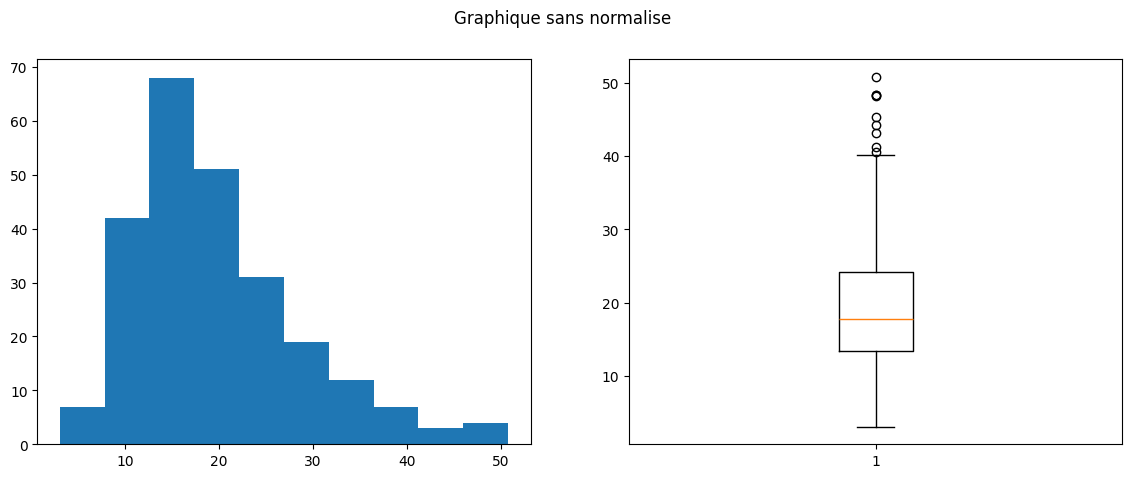

In [15]:
#grapgique avant la normalisation
plt.figure(figsize=(14, 5))  # Taille des graphes
plt.subplot(1, 2,1) # position
plt.hist(tips.total_bill)
plt.subplot(1, 2,2) #position
plt.boxplot(tips.total_bill)

plt.suptitle("Graphique sans normalise")

plt.show()

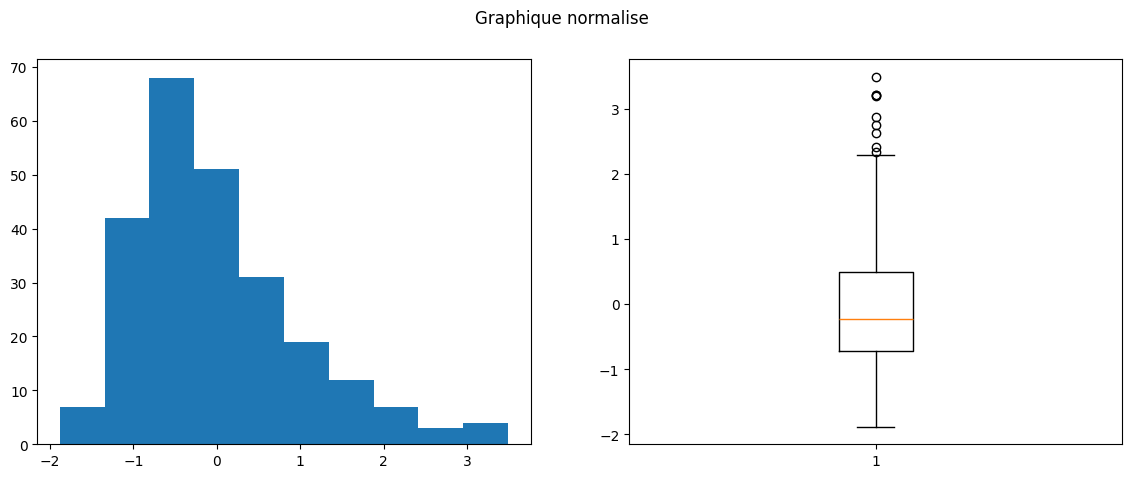

In [16]:
#grapgique avant la normalisation
plt.figure(figsize=(14, 5))  # Taille des graphes
plt.subplot(1, 2,1) # position
plt.hist(scaled_data)
plt.subplot(1, 2,2) #position
plt.boxplot(scaled_data)

plt.suptitle("Graphique normalise")
plt.show()

8) Comparer le temps d'entraînement du modèle à celui trouvé à la question 6.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

X = df_copy.drop(columns='tip')
y = df_copy['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

start_time = time.time()

model= LinearRegression()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
end_time = time.time()

training_time = end_time - start_time

r2 = r2_score(y_test, y_test_pred)
print(f"Score R² : {r2:.4f}, temps du model {training_time:.4f} sg")

Score R² : 0.4876, temps du model 0.0100 sg


## Partie 2

1) Télecharger les données iris de seaborn

In [18]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Le but est de classifier les fleurs à partir des variables sepal_length, sepal_width, petal_length, petal_width

2) Encoder la variable ```species```

In [20]:
label_encode = LabelEncoder()
label_encode.fit(data[['species']])
label_features_specie = label_encode.transform(data[['species']])
data['species']=label_features_specie
label_features_specie

c:\Users\Jose Fabian Cardona\Desktop\Sas_simplon\streamlit_data\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jose Fabian Cardona\Desktop\Sas_simplon\streamlit_data\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

3) Exécuter le code suivant qui permet de modéliser les données et d'évaluer le modèle. Calculer le temps d'entrainement de modèle.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

#results = pd.DataFrame(columns=[ "Accuracy", "Time (s)"])

df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]

X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

clf = LogisticRegression(max_iter=1_000)
clf.fit(X_train, y_train)
#start time
start_time = time.time()

# Prédictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

#end time
end_time = time.time()

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

training_time = end_time - start_time

#results = results.append({ "Accuracy": accuracy, "Time (s)": training_time}, ignore_index=True)

print(f"temps du model {training_time:.4f} sg")
print(f"Précision : {accuracy:.4f}")
print(f"Score F1 (weighted) : {f1:.4f}")


temps du model 0.0080 sg
Précision : 1.0000
Score F1 (weighted) : 1.0000


4) Afficher les histogrammes des features

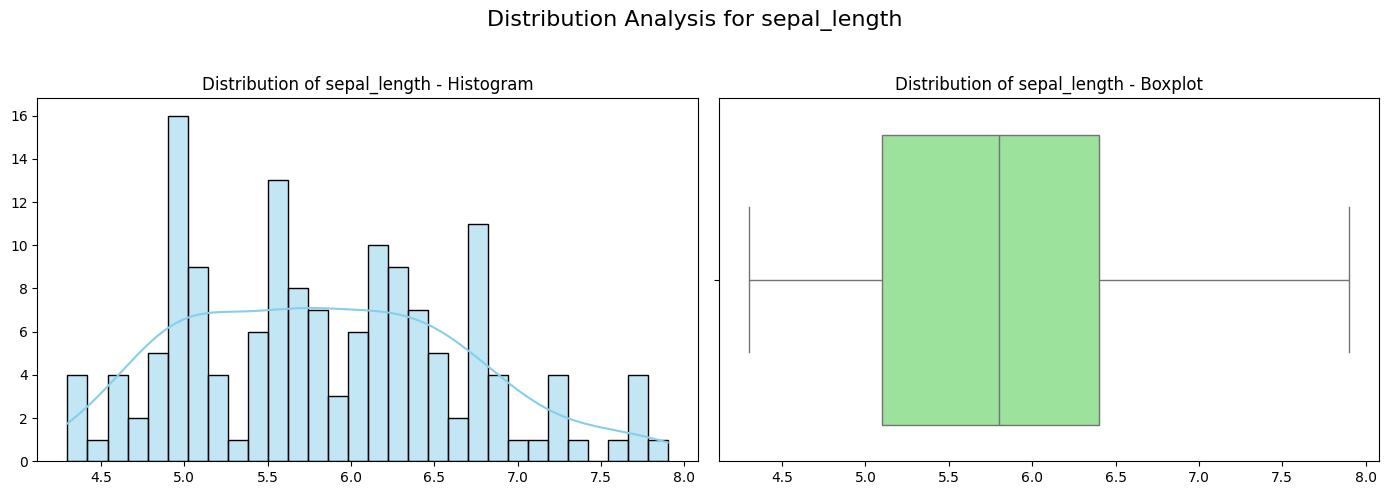

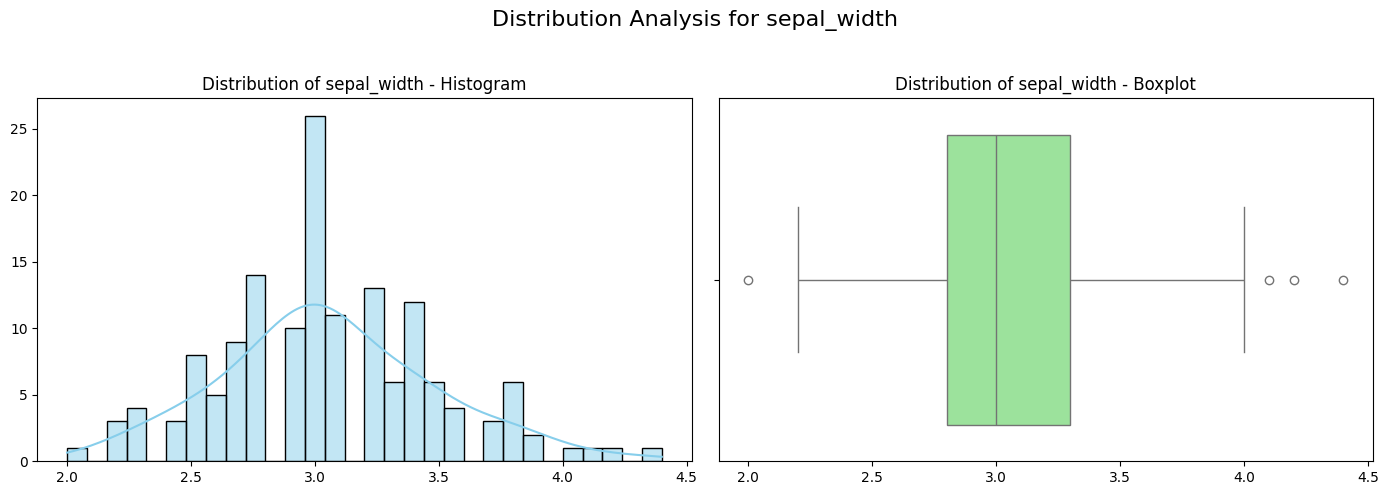

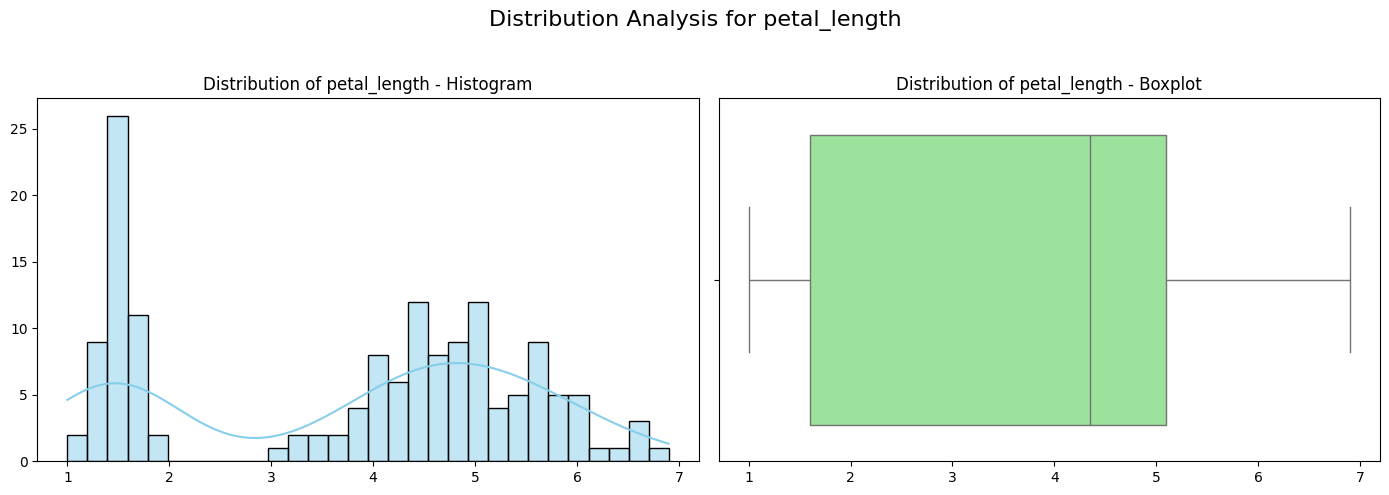

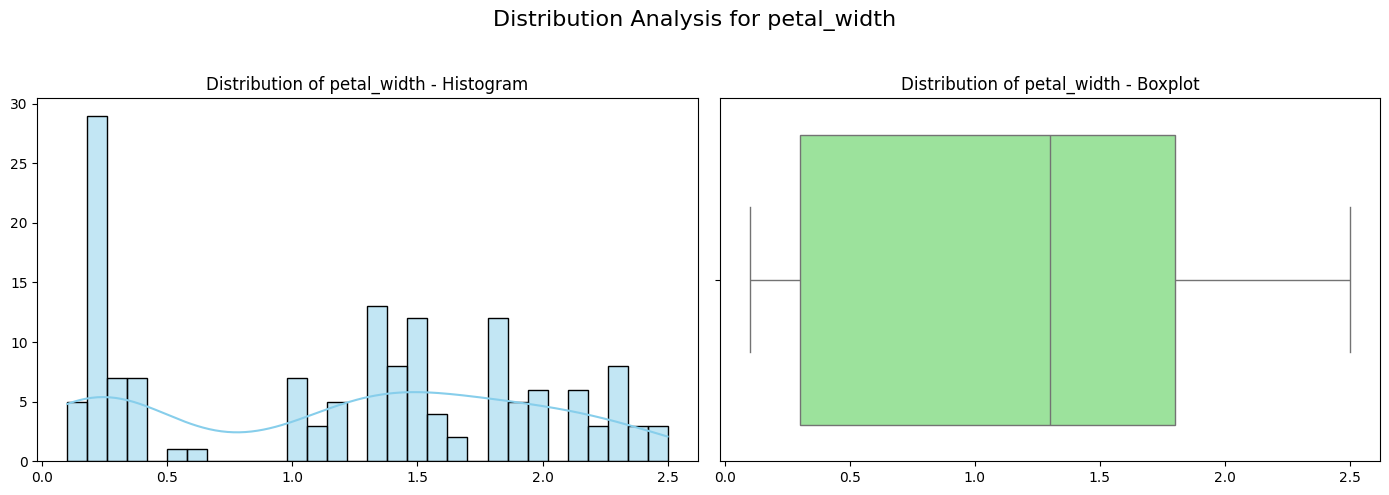

In [22]:

numeric_cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in numeric_cols:
        plt.figure(figsize=(14, 5))  # Taille des graphes

        # Histograme con KDE
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col} - Histogram')  # Títre específique
        plt.xlabel('')  # axis X vide
        plt.ylabel('')  # axis  Y vide

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col], color='lightgreen')
        plt.title(f'Distribution of {col} - Boxplot')  # Títre específique
        plt.xlabel('')  # # axis X vide
        plt.ylabel('')  # # axis Y vide

        plt.suptitle(f'Distribution Analysis for {col}', fontsize=16)  # Títre general
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste l'espace du titre
        plt.show()

5) Standardiser les features

In [23]:
# methode standardscaler
stdcaler = StandardScaler()
scaled_data_iris = stdcaler.fit_transform(data[['sepal_width']])
data['sepal_width']= scaled_data_iris

In [24]:
# methode mimmax
mmcaler = MinMaxScaler()
mmscaled_data_iris = mmcaler.fit_transform(data[['sepal_length']])
data['sepal_length']= mmscaled_data_iris

In [25]:
mmscaled_data_pl = mmcaler.fit_transform(data[['petal_length']])
data['petal_length']= mmscaled_data_pl

In [26]:
mmscaled_data_pw = mmcaler.fit_transform(data[['petal_width']])
data['petal_width']= mmscaled_data_pw

6) Comparer le temps d'entraînement du modèle à celui trouvé à la question 3.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time


df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]

X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

clf = LogisticRegression(max_iter=1_000)
clf.fit(X_train, y_train)
#start time
start_time = time.time()

# Prédictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

#end time
end_time = time.time()

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

training_time = end_time - start_time


print(f"temps du model {training_time:.4f} sg")
print(f"Précision : {accuracy:.4f}")
print(f"Score F1 (weighted) : {f1:.4f}")

temps du model 0.0091 sg
Précision : 0.9667
Score F1 (weighted) : 0.9664
